Openning ./sample1.csv


<IPython.core.display.Javascript object>


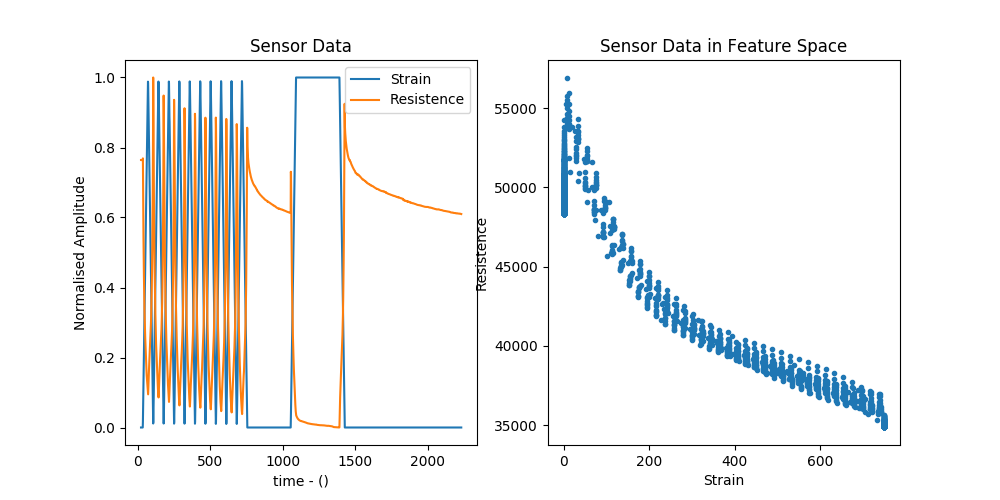

Openning ./sample2.csv


<IPython.core.display.Javascript object>


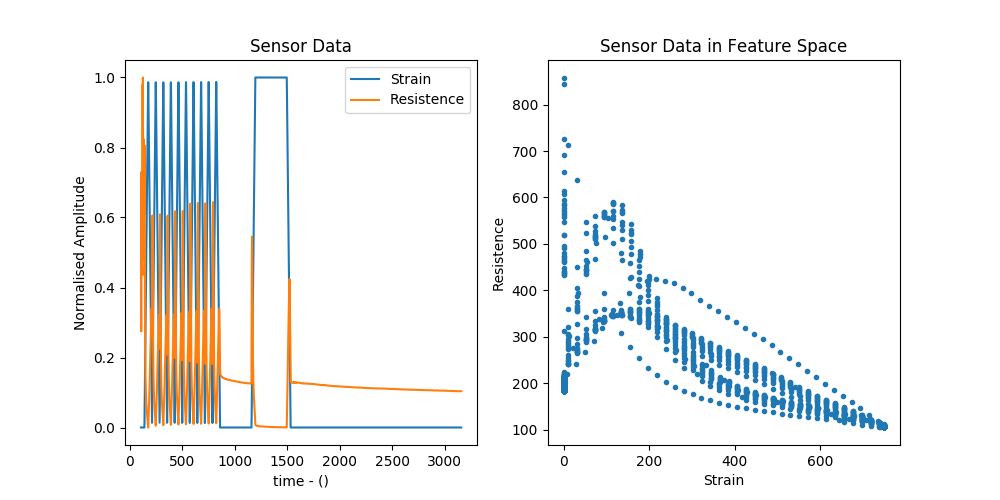

Openning ./sample3.csv


<IPython.core.display.Javascript object>


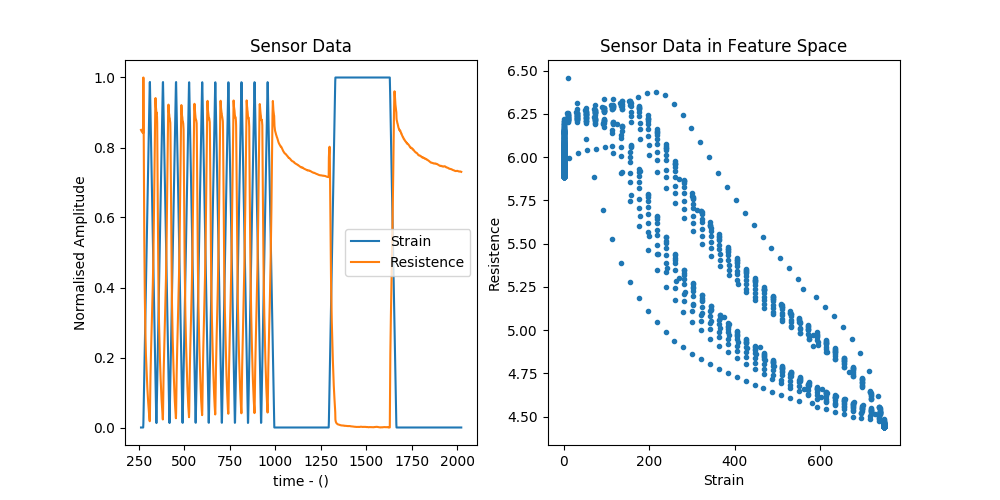

Openning ./sample4.csv


<IPython.core.display.Javascript object>


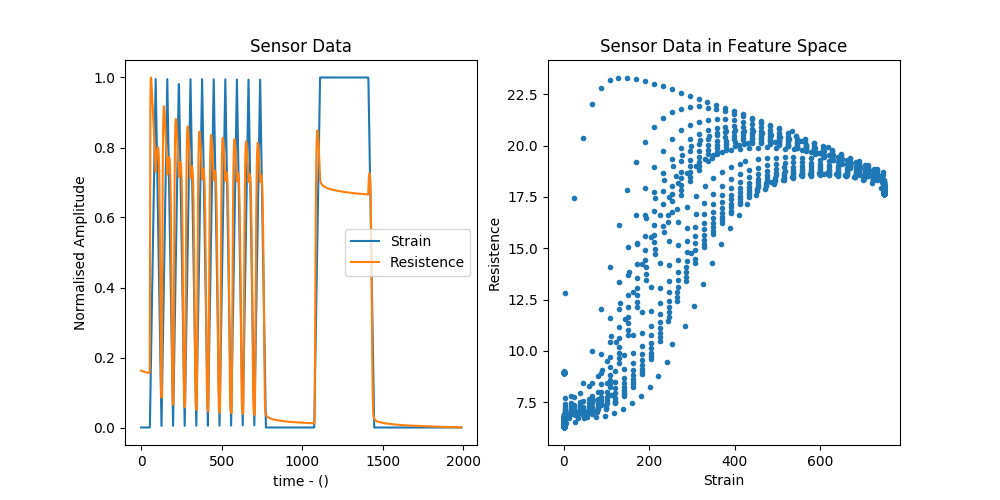

Openning ./sample5.csv


<IPython.core.display.Javascript object>


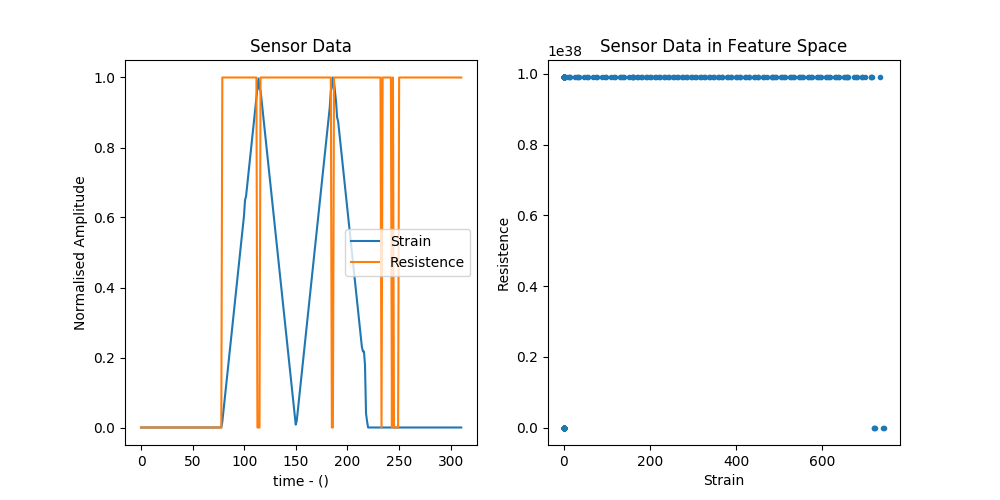

Openning ./sample6.csv


<IPython.core.display.Javascript object>


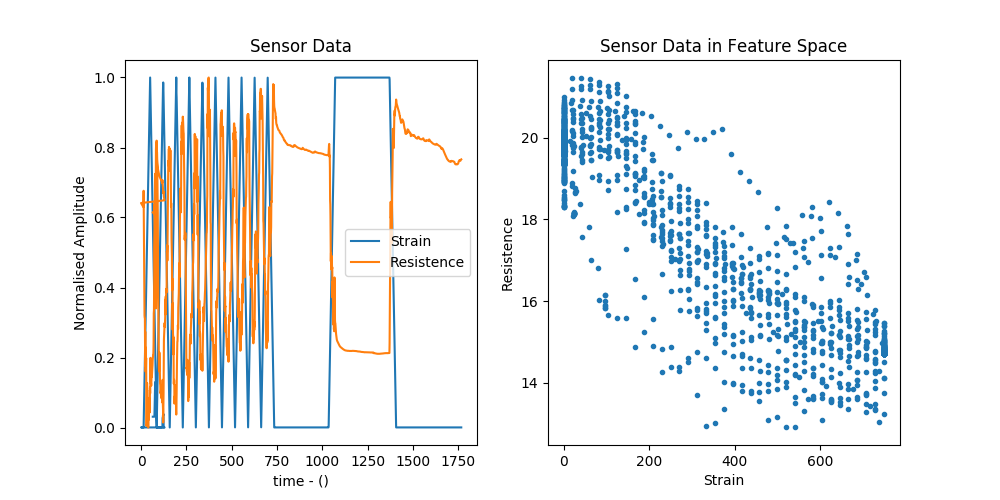

Openning ./sample7.csv


<IPython.core.display.Javascript object>


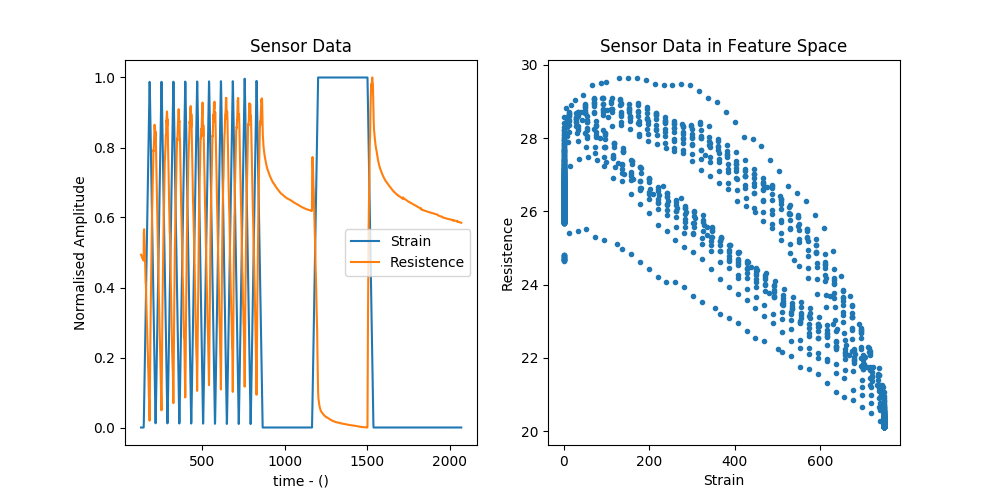

Openning ./sample8.csv


<IPython.core.display.Javascript object>


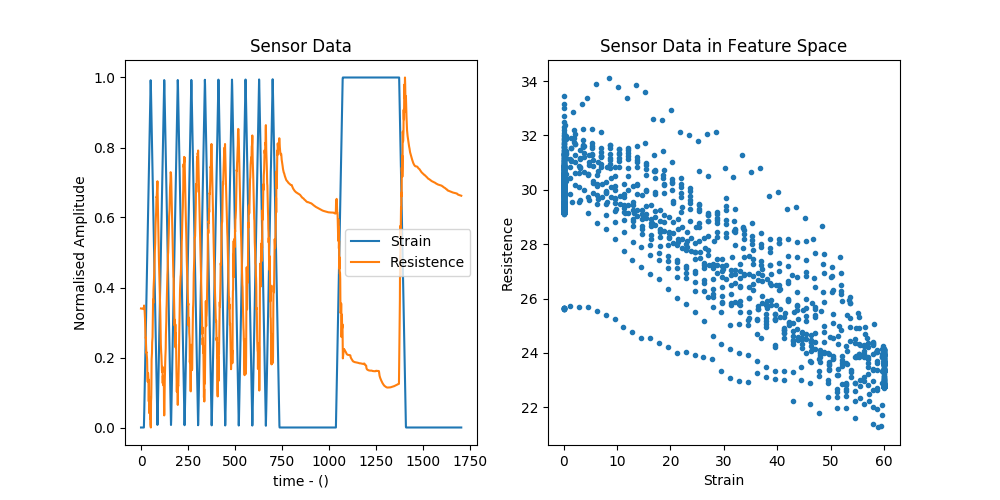

Openning ./sample9.csv


<IPython.core.display.Javascript object>


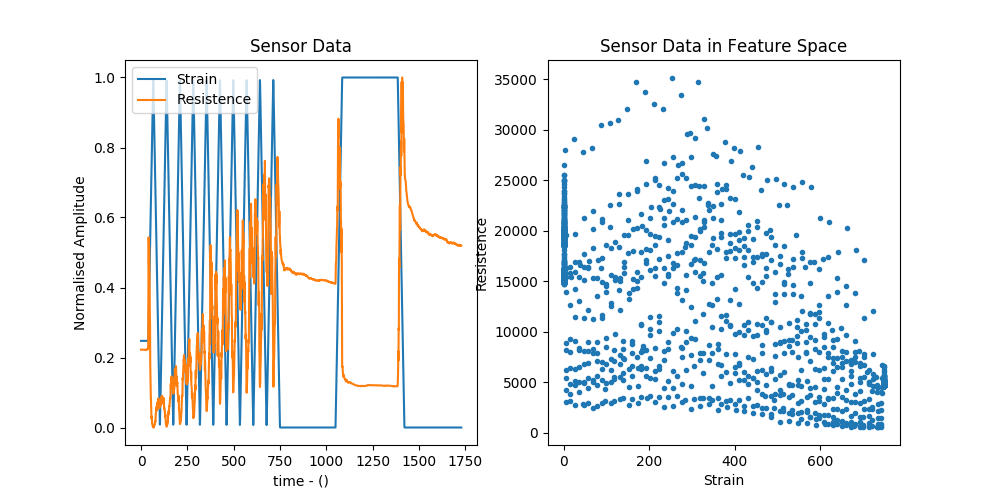

In [9]:
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]
import itertools
import timeit

number_of_samples = 9
samples = []
normalised_samples = []

for i in range(0,number_of_samples) :
    #Loading Data
    samples.append(pd.read_csv('sample'+str(i+1)+'.csv',index_col =0,  header = None, names = ['time', 'strain', 'resistence'], usecols = [0,1,2]))
    normalised_samples.append((samples[i]-samples[i].min())/(samples[i].max()-samples[i].min()))
    print('Openning ./sample'+str(i+1)+'.csv')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].set_title('Sensor Data')
    axes[0].plot(list(samples[i].index),list(normalised_samples[i]['strain']),list(samples[i].index),list(normalised_samples[i]['resistence']))
    axes[0].set_xlabel('time - ()')
    axes[0].set_ylabel('Normalised Amplitude')
    axes[0].legend(['Strain','Resistence'])

    axes[1].set_title('Sensor Data in Feature Space')
    axes[1].scatter(list(samples[i]['strain']),list(samples[i]['resistence']), marker = '.')
    axes[1].set_xlabel('Strain')
    axes[1].set_ylabel('Resistence')
    plt.show()
    

<IPython.core.display.Javascript object>


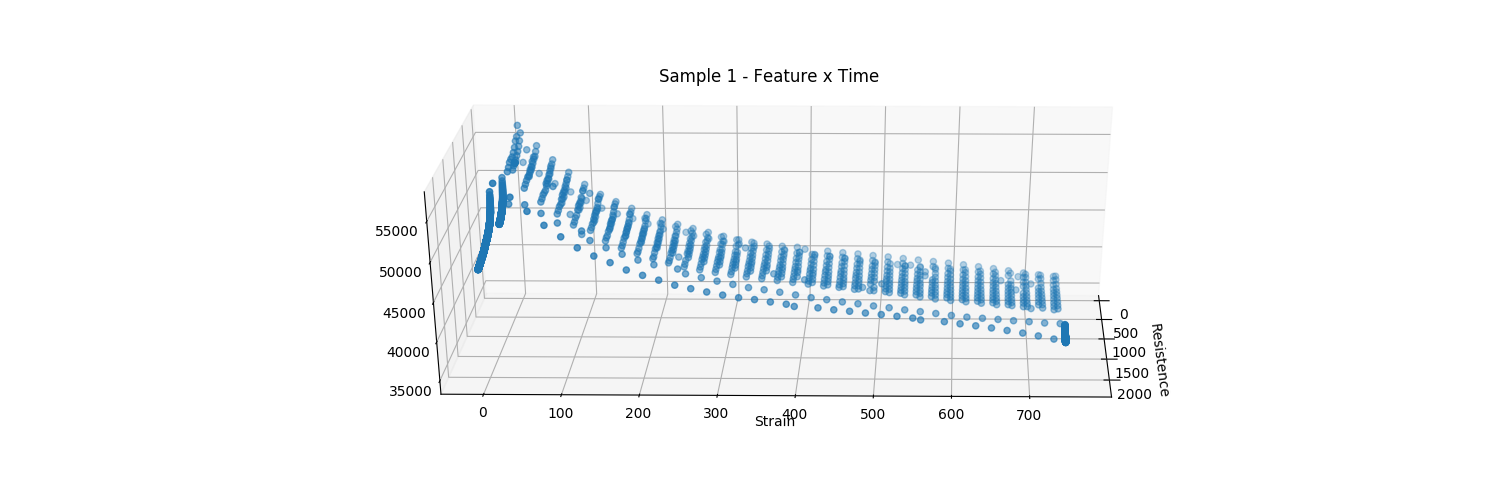

In [5]:
#Time Variance Visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.scatter(list(samples[0].index),list(samples[0]['strain']), list(samples[0]['resistence']), cmap=cm.coolwarm)
ax.set_title('Sample 1 - Feature x Time')
ax.set_xlabel('Time')
ax.set_ylabel('Strain')
ax.set_xlabel('Resistence')
plt.show()

<IPython.core.display.Javascript object>


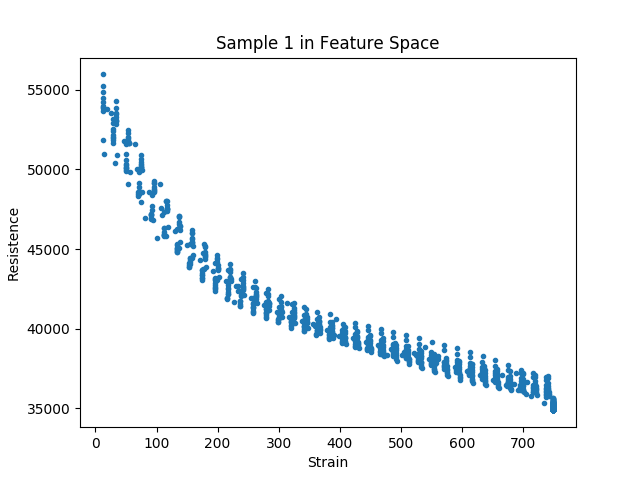

In [126]:
#Filtering Suggestions
sample = samples[0]
s = sample[sample.strain >= 10]
s = s.sample(frac=1)

fig, ax = plt.subplots()
ax.scatter(list(s['strain']),list(s['resistence']), marker = '.')
ax.set_title('Sample 1 in Feature Space')
ax.set_xlabel('Strain')
ax.set_ylabel('Resistence')
plt.show()

Total data size: 1081. Train data size: 864. Test data size: 217.
Coefficients: 
 [-0.04910354]
Mean squared error: 7215.80
Variance score: 0.89


/home/attyla/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


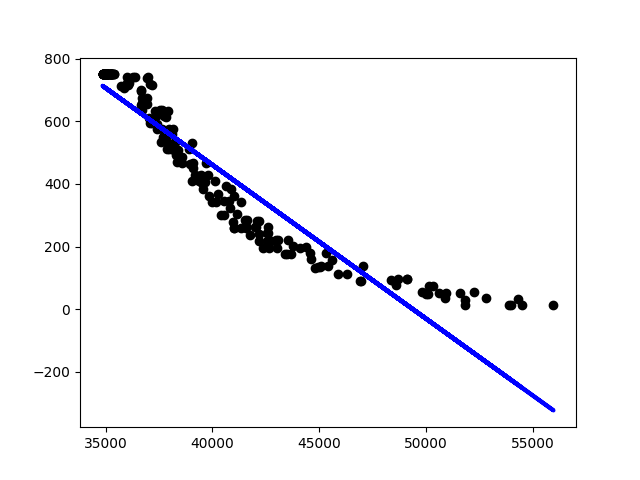

In [111]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Splitting train and test dataset
train_size = floor(0.8*s.shape[0])
train_data = s.iloc[0:train_size]
test_data = s.iloc[train_size:]
print('Total data size: ',s.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.',sep='')

# Create linear regression object
regr = linear_model.LinerRegression()

# Train the model using the training sets
regr.fit(train_data['resistence'].as_matrix().reshape(-1, 1),train_data['strain'].as_matrix().reshape(-1, 1))

# Make predictions using the testing set
strain_pred = regr.predict(test_data['resistence'].as_matrix().reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_data['strain'].as_matrix(), strain_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_data['strain'].as_matrix(), strain_pred))
fig, ax = plt.subplots()
# Plot outputs
ax.scatter(list(test_data['resistence']), test_data['strain'].as_matrix(),  color='black')
ax.plot(list(test_data['resistence']), strain_pred, color='blue', linewidth=3)

plt.show()

<IPython.core.display.Javascript object>


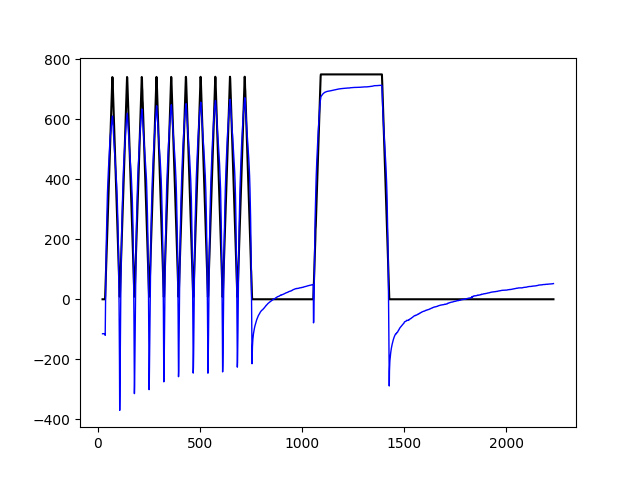

In [125]:
fig, ax = plt.subplots()
# Plot outputs
ax.plot(sample.index, list(sample['strain']),  color='black')
ax.plot(sample.index, regr.predict(sample['resistence'].as_matrix().reshape(-1, 1)), color='blue', linewidth=1)

plt.show()

In [118]:
#Errors


,strain,resistence
time,,
525.538,299.712317,40623.734
348.501,512.343939,38376.927
386.513,195.821416,42863.884
733.574,466.149538,38424.181
1369.703,750.045985,34872.008
514.536,528.963400,38140.189
166.459,279.575806,41655.850
277.489,533.164900,38285.972
680.565,70.345774,48450.245
